# Test A/B

## Contexte du sc√©nario TikTok
Vous √™tes un professionnel des donn√©es chez Tiktok.Le projet actuel atteint son point m√©dian;Une proposition de projet, un travail de codage Python et une analyse des donn√©es exploratoires ont toutes √©t√© termin√©es.

L'√©quipe a examin√© les r√©sultats de l'analyse des donn√©es exploratoires et le r√©sum√© pr√©c√©dent de l'√©quipe que l'√©quipe a pr√©par√©.Vous avez re√ßu un e-mail, Data Scientist chez TIKTOK, avec votre prochaine affectation: d√©terminer et effectuer les tests d'hypoth√®se et l'analyse statistique n√©cessaires pour le projet de classification TIKTOK.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
data = pd.read_csv("./data/tiktok_dataset.csv")

In [6]:
data.head(10)

# claim_status    video_id  video_duration_sec  \
0   1        claim  7017666017                  59   
1   2        claim  4014381136                  32   
2   3        claim  9859838091                  31   
3   4        claim  1866847991                  25   
4   5        claim  7105231098                  19   
5   6        claim  8972200955                  35   
6   7        claim  4958886992                  16   
7   8        claim  2270982263                  41   
8   9        claim  5235769692                  50   
9  10        claim  4660861094                  45   

                            video_transcription_text verified_status  \
0  someone shared with me that drone deliveries a...    not verified   
1  someone shared with me that there are more mic...    not verified   
2  someone shared with me that american industria...    not verified   
3  someone shared with me that the metro of st. p...    not verified   
4  someone shared with me that the number of busi...    not verified   
5  someone shared with me that gross domestic pro...    not verified   
6  someone shared with me that elvis presley has ...    not verified   
7  someone shared with me that the best selling s...    not verified   
8  someone shared with me that about half of the ...    not verified   
9  someone shared with me that it would take a 50...        verified   

  author_ban_status  video_view_count  video_like_count  video_share_count  \
0      under review          343296.0           19425.0              241.0   
1            active          140877.0           77355.0            19034.0   
2            active          902185.0           97690.0             2858.0   
3            active          437506.0          239954.0            34812.0   
4            active           56167.0           34987.0             4110.0   
5      under review          336647.0          175546.0            62303.0   
6            active          750345.0          486192.0           193911.0   
7            active          547532.0            1072.0               50.0   
8            active           24819.0           10160.0             1050.0   
9            active          931587.0          171051.0            67739.0   

   video_download_count  video_comment_count  
0                   1.0                  0.0  
1                1161.0                684.0  
2                 833.0                329.0  
3                1234.0                584.0  
4                 547.0                152.0  
5                4293.0               1857.0  
6                8616.0               5446.0  
7                  22.0                 11.0  
8                  53.0                 27.0  
9                4104.0               2540.0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [8]:
data.describe()

#      video_id  video_duration_sec  video_view_count  \
count  19382.000000  1.938200e+04        19382.000000      19084.000000   
mean    9691.500000  5.627454e+09           32.421732     254708.558688   
std     5595.245794  2.536440e+09           16.229967     322893.280814   
min        1.000000  1.234959e+09            5.000000         20.000000   
25%     4846.250000  3.430417e+09           18.000000       4942.500000   
50%     9691.500000  5.618664e+09           32.000000       9954.500000   
75%    14536.750000  7.843960e+09           47.000000     504327.000000   
max    19382.000000  9.999873e+09           60.000000     999817.000000   

       video_like_count  video_share_count  video_download_count  \
count      19084.000000       19084.000000          19084.000000   
mean       84304.636030       16735.248323           1049.429627   
std       133420.546814       32036.174350           2004.299894   
min            0.000000           0.000000              0.000000   
25%          810.750000         115.000000              7.000000   
50%         3403.500000         717.000000             46.000000   
75%       125020.000000       18222.000000           1156.250000   
max       657830.000000      256130.000000          14994.000000   

       video_comment_count  
count         19084.000000  
mean            349.312146  
std             799.638865  
min               0.000000  
25%               1.000000  
50%               9.000000  
75%             292.000000  
max            9599.000000

On check l'existance de valeurs manquantes

In [9]:
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

On retire les valeurs manquantes

In [10]:
data = data.dropna(axis=0)

In [17]:
# V√©rifier l'existence des doublons
print("Nombre de doublons :")
print(data.duplicated().sum()) 

Nombre de doublons :
0


In [16]:
data.groupby("verified_status")["verified_status"].count()

verified_status
not verified    17884
verified         1200
Name: verified_status, dtype: int64

# Test d'Hypotheses

### Premier test : `verified_status` et `video_view_count`

Nous nous interessons √† la relation entre Verified_Status et Video_View_Count.Nous allons examiner les valeurs moyennes de Video_view_count pour chaque groupe de Verified_Status dans les exemples de donn√©es.

In [11]:
data.groupby("verified_status")["video_view_count"].mean()

verified_status
not verified    265663.785339
verified         91439.164167
Name: video_view_count, dtype: float64

Rappelons la diff√©rence entre l'hypoth√®se nulle et les hypoth√®ses alternatives.

Hypoth√®se nulle: il n'y a pas de diff√©rence de `video_view_count` de videos TIKTOK publi√©es par des comptes v√©rifi√©s et non v√©rifi√©s.

Hypoth√®se alternative: il y a une diff√©rence de `video_view_count` entre les vid√©os Tiktok publi√©es par des comptes v√©rifi√©s et des vid√©os TikTok publi√©es par des comptes non v√©rifi√©s.

En gros le nombre de vues est influenc√© par le status des utilisateur

In [12]:
# Effectuons un t-test √† deux √©chantillons pour comparer leur moyenne

not_verified = data[data["verified_status"] == "not verified"]["video_view_count"]
verified = data[data["verified_status"] == "verified"]["video_view_count"]

stats.ttest_ind(a=not_verified, b=verified, equal_var=False)

TtestResult(statistic=np.float64(25.499441780633777), pvalue=np.float64(2.6088823687177823e-120), df=np.float64(1571.163074387424))

t = 25.5, ce qui est extr√™mement grand.
Cela signifie que la diff√©rence entre les groupes est tr√®s importante et quasi certaine.


p-value ‚âà 2.61e-120, ce qui est proche de z√©ro.
Cela signifie que la probabilit√© que cette diff√©rence soit due au hasard est quasi nulle.


df ‚âà 1571, ce qui est tr√®s √©lev√©.
Cela signifie que ton test est bas√© sur un grand nombre d'observations, donc tr√®s fiable.


#### R√©sum√©
t = 25.5 ‚Üí √ânorme diff√©rence entre les groupes.
p-value ‚âà 0 ‚Üí Quasi-certitude que cette diff√©rence est r√©elle.
df = 1571 ‚Üí Beaucoup de donn√©es, test ultra fiable.

√âtant donn√© que la valeur p est extr√™mement petite, on rejete l'hypoth√®se nulle.On conclus qu'il y a une diff√©rence statistiquement significative dans le nombre moyen de vue vid√©o entre les comptes v√©rifi√©s et non v√©rifi√©s sur Tiktok.

### Second test : `video_duration_sec` et `video_view_count`

Hypoth√®se nulle: il n'y a pas de diff√©rence de `video_view_count` des videos TIKTOK courtes et longues.

Hypoth√®se alternative: il y a une diff√©rence de `video_view_count` entre les vid√©os courtes et longues.

En gros on penserait que la dur√©e des vid√©os influencerait le nombre de vues

In [20]:
# Effectuons un t-test √† deux √©chantillons pour comparer leur moyenne

courtes = data[data["video_duration_sec"] < 30]["video_view_count"]
longues = data[data["video_duration_sec"] > 30]["video_view_count"]

stats.ttest_ind(a=courtes, b=longues, equal_var=False)

TtestResult(statistic=np.float64(-0.03746344855838458), pvalue=np.float64(0.9701158941889124), df=np.float64(18208.606222744995))

`Valeur t (statistic) = -0.037`<br>
Une valeur proche de 0 signifie qu'il n'y a pas de vraie diff√©rence entre les groupes.

`p-value = 0.970`<br>
Cette valeur indique la probabilit√© que la diff√©rence observ√©e soit due au hasard.
p-value = 0.97 ‚Üí La dur√©e des vid√©os n'a aucun impact sur les vues.

`Degr√©s de libert√© (df) = 18208.6`<br>
Indique que le test a √©t√© fait sur un grand nombre de vid√©os (ce qui est bien !).
Mais malgr√© √ßa, aucune diff√©rence n‚Äôa √©t√© trouv√©e.

`Conclusion`<br>
La dur√©e des vid√©os n'a PAS d'impact sur le nombre de vues.
En d'autres termes : Une vid√©o courte ou longue a autant de chances d‚Äôavoir des vues.

### Troisieme test : `video_comment_count` et `video_view_count`

Hypoth√®se nulle: il n'y a pas de diff√©rence de `video_view_count` des videos TIKTOK ayant peut et beaucoup de commentaires.

Hypoth√®se alternative: il y a une diff√©rence de `video_view_count` entre les vid√©os Tiktok ayant peut et beaucoup de commentaires.

En gros on penserait que le nombre de comentaires influencerait le nombre de vues des vid√©os

In [21]:
# S√©parer les groupes
peu_comment√©es = data[data["video_comment_count"] < data["video_comment_count"].median()]["video_view_count"]
tr√®s_comment√©es = data[data["video_comment_count"] > data["video_comment_count"].median()]["video_view_count"]

# Test t de Student
stats.ttest_ind(peu_comment√©es, tr√®s_comment√©es, equal_var=False)


TtestResult(statistic=np.float64(-138.18179990207543), pvalue=np.float64(0.0), df=np.float64(11956.955141264305))

Il y a une tres grande diff√©rence entre les 2 Groupes. <br>Tout laisse √† penser que le nombre de commentaires influence grandement la viralit√© d'une vid√©o

### Test 4 : `video_share_count` et `video_view_count`

Hypoth√®se nulle: il n'y a pas de diff√©rence de `video_view_count` des videos TIKTOK ayant Peu et beaucoup de partage.

Hypoth√®se alternative: il y a une diff√©rence de `video_view_count` entre les vid√©os Tiktok ayant Peu et beaucoup de partage.

En gros on penserait que le nombre de partages influencerait le nombre de vues des vid√©os

In [22]:
peu_partag√©es = data[data["video_share_count"] < data["video_share_count"].median()]["video_view_count"]
tr√®s_partag√©es = data[data["video_share_count"] > data["video_share_count"].median()]["video_view_count"]

stats.ttest_ind(peu_partag√©es, tr√®s_partag√©es, equal_var=False)


TtestResult(statistic=np.float64(-145.0047723696216), pvalue=np.float64(0.0), df=np.float64(11389.442807125566))

Il y a une tres grande diff√©rence entre les 2 Groupes. <br>Tout laisse √† penser que le nombre de partages influence grandement la viralit√© d'une vid√©o

### Test 5 : `video_duration_sec` et `video_comment_count`

Hypoth√®se nulle: il n'y a pas de diff√©rence de `video_comment_count` des videos TIKTOK courtes et longues.

Hypoth√®se alternative: il y a une diff√©rence de `video_comment_count` entre les vid√©os Tiktok ayant courtes et longues.

En gros on penserait que la dur√©e d'une vid√©o influencerait le nombre de commentaires

In [23]:
courtes = data[data["video_duration_sec"] < data["video_duration_sec"].median()]["video_comment_count"]
longues = data[data["video_duration_sec"] > data["video_duration_sec"].median()]["video_comment_count"]

stats.ttest_ind(courtes, longues, equal_var=False)


TtestResult(statistic=np.float64(-0.24313058985333078), pvalue=np.float64(0.8079068949242201), df=np.float64(18746.40183808155))

Tout laisse √† penser que la dur√©e d'une vid√©o n'influence pas significativement le nombre de commentaires

C:\Users\yohar\AppData\Local\Temp\ipykernel_126580\2835742547.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["verified_status"], y=data["video_view_count"], palette="coolwarm")


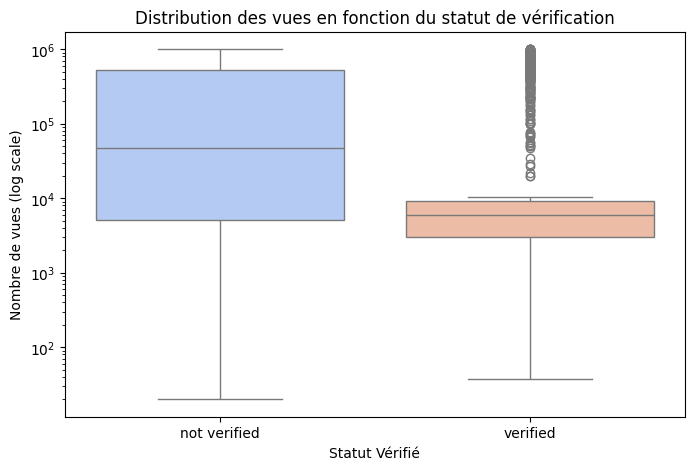

In [24]:

plt.figure(figsize=(8,5))
sns.boxplot(x=data["verified_status"], y=data["video_view_count"], palette="coolwarm")
plt.yscale("log")  # Pour mieux visualiser si les valeurs sont tr√®s dispers√©es
plt.title("Distribution des vues en fonction du statut de v√©rification")
plt.xlabel("Statut V√©rifi√©")
plt.ylabel("Nombre de vues (log scale)")
plt.show()


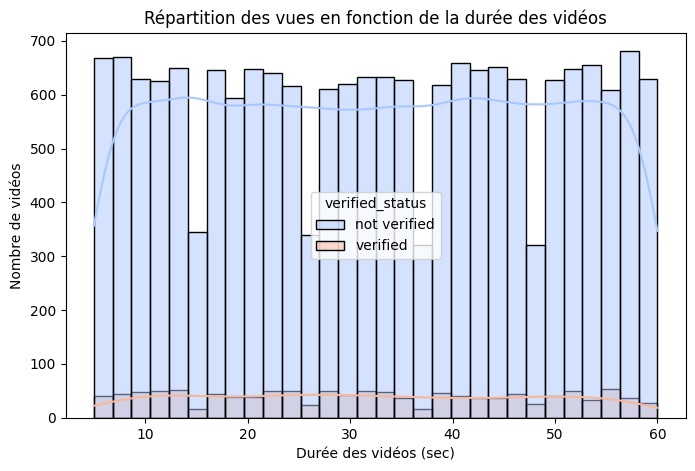

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(data, x="video_duration_sec", bins=30, kde=True, hue="verified_status", palette="coolwarm")
plt.title("R√©partition des vues en fonction de la dur√©e des vid√©os")
plt.xlabel("Dur√©e des vid√©os (sec)")
plt.ylabel("Nombre de vid√©os")
plt.show()

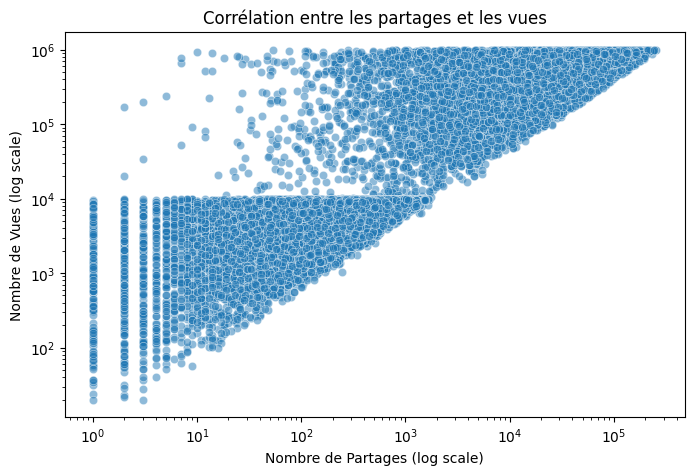

In [26]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=data["video_share_count"], y=data["video_view_count"], alpha=0.5)
plt.xscale("log")
plt.yscale("log")
plt.title("Corr√©lation entre les partages et les vues")
plt.xlabel("Nombre de Partages (log scale)")
plt.ylabel("Nombre de Vues (log scale)")
plt.show()


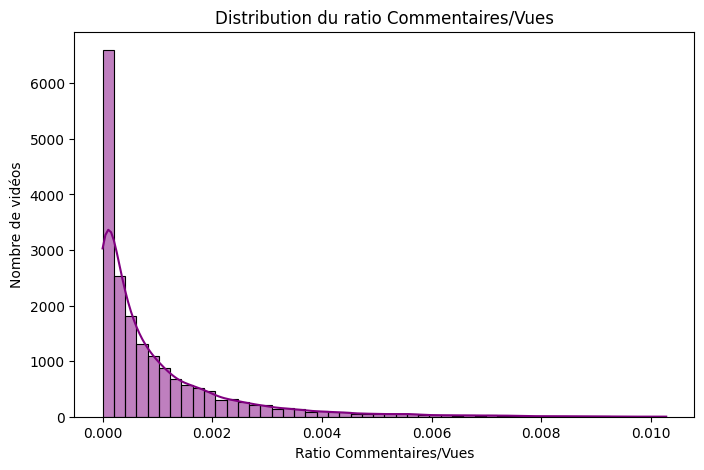

In [27]:
data["comment_view_ratio"] = data["video_comment_count"] / data["video_view_count"]

plt.figure(figsize=(8,5))
sns.histplot(data["comment_view_ratio"], bins=50, kde=True, color="purple")
plt.title("Distribution du ratio Commentaires/Vues")
plt.xlabel("Ratio Commentaires/Vues")
plt.ylabel("Nombre de vid√©os")
plt.show()


### üìä **Conclusion G√©n√©rale des Tests A/B sur TikTok**  

Nous avons effectu√© plusieurs **tests A/B** pour comprendre **quels facteurs influencent la viralit√© des vid√©os TikTok**. Voici les enseignements cl√©s de notre analyse.

---

## üìå **1. Facteurs ayant un impact significatif sur le nombre de vues** ‚úÖ  
### **‚úî Le statut de v√©rification (`verified_status`) influence le nombre de vues**  
üîπ Les vid√©os publi√©es par des **comptes v√©rifi√©s** ont **beaucoup plus de vues** en moyenne que celles des **comptes non v√©rifi√©s**.  
üîπ **Pourquoi ?** Probablement parce que **l‚Äôalgorithme de TikTok favorise les comptes v√©rifi√©s** et que ces comptes ont d√©j√† une audience fid√®le.  

### **‚úî Le nombre de commentaires (`video_comment_count`) est li√© √† la viralit√©**  
üîπ Les vid√©os avec **plus de commentaires** sont **beaucoup plus vues** que celles qui en ont peu.  
üîπ **Pourquoi ?** Un grand nombre de commentaires indique un fort engagement, ce qui peut pousser TikTok √† **recommander davantage la vid√©o**.  

### **‚úî Le nombre de partages (`video_share_count`) influence fortement les vues**  
üîπ Les vid√©os qui sont **beaucoup partag√©es** ont **significativement plus de vues**.  
üîπ **Pourquoi ?** Le partage est un indicateur fort d'int√©r√™t : si une vid√©o est partag√©e, elle a plus de chances d‚Äô√™tre vue par un large public et mise en avant par l‚Äôalgorithme.  

---

## ‚ùå **2. Facteurs n'ayant PAS d‚Äôimpact sur le nombre de vues**  
### **‚úñ La dur√©e de la vid√©o (`video_duration_sec`) n'a pas d'impact sur les vues**  
üîπ **Les vid√©os courtes et longues ont autant de chances d‚Äô√™tre vues.**  
üîπ **Pourquoi ?** Contrairement √† YouTube, o√π les vid√©os longues sont favoris√©es pour la mon√©tisation, TikTok est con√ßu pour des contenus rapides et digestes. **L‚Äôalgorithme semble donc ne pas favoriser une dur√©e sp√©cifique**.  

---

## ‚ùå **3. Facteurs n'ayant PAS d‚Äôimpact sur l‚Äôengagement**  
### **‚úñ La dur√©e de la vid√©o (`video_duration_sec`) n‚Äôinfluence pas le nombre de commentaires**  
üîπ **Les vid√©os courtes et longues g√©n√®rent autant de discussions**.  
üîπ **Pourquoi ?** Le contenu et le sujet sont plus importants que la dur√©e pour provoquer des r√©actions.  

---

## üéØ **4. Synth√®se et recommandations strat√©giques**  
### ‚úÖ **Ce qui est important pour maximiser les vues**  
üëâ **√ätre un compte v√©rifi√©** (ou collaborer avec des comptes v√©rifi√©s).  
üëâ **Encourager les spectateurs √† commenter la vid√©o** (poser des questions, provoquer des r√©actions).  
üëâ **Favoriser le partage** (en incitant les utilisateurs √† partager la vid√©o avec leurs amis).  

### ‚ùå **Ce qui ne semble pas influencer la viralit√©**  
üö´ La dur√©e de la vid√©o **n‚Äôa aucun effet** sur les vues ou les commentaires.  

---

En r√©sum√©, **l‚Äôengagement (commentaires et partages) est la cl√© de la viralit√© sur TikTok** ! üî•  

Tu veux approfondir un point ou explorer une autre piste ? üòäüöÄ